# **Titanic Spaceship Analysis and Prediction**

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import os



##  Loading Data

In [127]:
train_data = pd.read_csv(r"C:\Users\nuzha\Downloads\train.csv")
test_data = pd.read_csv(r"C:\Users\nuzha\Downloads\test.csv")

#Checking train data set
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


The DataFrame has information on 8,693 passengers across 14 different categories, like Passenger ID, Home Planet, and whether they were in CryoSleep. Some columns have missing values, notably HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, and Name, indicating not all passenger details are fully recorded.


## EDA

In [128]:
#Checking unique values in the dataset 
df_columns = train_data.columns.values
for column in df_columns:
 
    print(f'{column} \t{train_data[column].nunique()}')


PassengerId 	8693
HomePlanet 	3
CryoSleep 	2
Cabin 	6560
Destination 	3
Age 	80
VIP 	2
RoomService 	1273
FoodCourt 	1507
ShoppingMall 	1115
Spa 	1327
VRDeck 	1306
Name 	8473
Transported 	2


The dataset has information on 8,693 passengers, showing where they're from, if they were in cryosleep, their cabin, destination, age, if they're a VIP, and their spending on services like room service and the spa. There are 3 unique home planets and destinations, 2 choices for cryosleep and VIP status, and a wide range of cabin types and names. Age is diverse, with 80 different values. Spending categories have over a thousand unique values each, indicating varied passenger behavior. Finally, there's a yes/no type of data on whether passengers were transported.

In [129]:
#Creating Columns for deck, cabin num and sides from the cabin column
train_data[['Deck','Cabin_Num','Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Deck','Cabin_Num','Side']] = test_data['Cabin'].str.split('/', expand=True)

train_data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [105]:
#Checking if there is null v.alue in the  train data set
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  Cabin_Num     8494 non-null   object 
 16  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


In [106]:
#Checking unique values in the dataset 
df_columns = train_data.columns.values
for column in df_columns:
 
    print(f'{column} \t{train_data[column].nunique()}')

PassengerId 	8693
HomePlanet 	3
CryoSleep 	2
Cabin 	6560
Destination 	3
Age 	80
VIP 	2
RoomService 	1273
FoodCourt 	1507
ShoppingMall 	1115
Spa 	1327
VRDeck 	1306
Name 	8473
Transported 	2
Deck 	8
Cabin_Num 	1817
Side 	2


## Descriptive Analysis

In [149]:
#Descriptive analysis to get the mean, median, mode and other statistics
train_data.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_Num,Side,passenger_group_freq
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693,8494,8494,8494,8693.000000
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2,8,1817,2,NaN
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True,F,82,S,NaN
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378,2794,28,4288,NaN
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN,NaN,NaN,NaN,2.035546
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN,NaN,NaN,NaN,1.596347
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN,NaN,NaN,NaN,3.000000


In [ ]:


columns_to_plot = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Deck','Cabin_Num','Side']

for column in columns_to_plot:
    sns.histplot(data=train_data, x=column, bins=20, kde=True)  # KDE=True adds a density estimate
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


The distribution of age in the provided histogram is roughly bell-shaped, suggesting a normal distribution with a slight right skew. Most of the data is concentrated around the 20 to 30 years age range, which is where the highest peak of the histogram occurs. The count of individuals gradually decreases as age increases, and there are fewer counts of individuals in the older age ranges.


The distribution of RoomService spending is highly skewed to the right, with the vast majority of observations clustered near the lower end of the scale and a long tail extending towards higher values. This indicates that most individuals spend a small amount on room service, with only a few spending large amounts.


The distribution of FoodCourt spending is right-skewed, indicating that most individuals spend low amounts with fewer individuals spending progressively higher amounts, as evidenced by the long tail extending to the right.


The distribution of ShoppingMall spending is right-skewed, with a large number of counts concentrated towards the lower end of the spending scale and a long tail indicating fewer instances of higher spending.

The distribution of Spa spending is right-skewed, indicating that the majority of observations are lower values with a small number of higher-value observations extending to the right.

he distribution of VRDeck spending is right-skewed, with most data points clustered near the lower end and a long tail indicating occasional higher spending.


The distribution is non-uniform and does not follow a clear pattern, with varying counts for different decks. Deck G also has a notably high count compared to some others, whereas decks like A, D, E, and T have fewer counts.


The distribution of the variable "Cabin_Num" depicted in the histogram is right-skewed, with a large number of low-value counts and a tail stretching towards the higher values. Most of the data is concentrated at the lower end of the "Cabin_Num" axis, and there are progressively fewer counts as the cabin number increases. The line graph superimposed on the histogram, likely a kernel density estimate, also indicates this right-skewed distribution.


The distribution of the "Side" variable is bimodal and categorical, with two bars representing counts of two categories, labeled "P" and "S". Both categories have a high count, roughly equal in number, indicating that the sample size for each side category is similar. The distribution suggests that there are two distinct groups in the data with respect to "Side".

Since none of the distribution are normal, we'll fill in the values with mediam value. But if mediam value is missing for a column, we'll use the most frequent value use in that column

##  Data Preprocessing, Graphical Analysis and  Feature Encoding

In [109]:
#Since for the cabin_num columns there are many null values, we'll fillin the the most frequest number used in the dataset 
medians = train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median()

train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(medians)



In [110]:
#Filling in missing values for most columns in your DataFrame with the most frequent value (mode) in each column
for column in train_data.columns:
    mode_value = train_data[column].mode()[0]
  
    train_data[column] = train_data[column].fillna(mode_value)


In [130]:
# Pull First 4 digits of passenger_id
for dataset in [train_data, test_data]:
    dataset['passenger_group'] = dataset['PassengerId'].astype(str).str[:4]
    dataset['passenger_group'] = dataset['passenger_group'].astype(int)

    #Generate Frequency of passenger group
    dataset['passenger_group_freq'] = dataset.groupby('passenger_group')['passenger_group'].transform('count')
    dataset.drop('passenger_group', axis=1, inplace=True)


In [113]:
train_data['Destination'].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

#### Passenger Counts by Home Planet and Destination

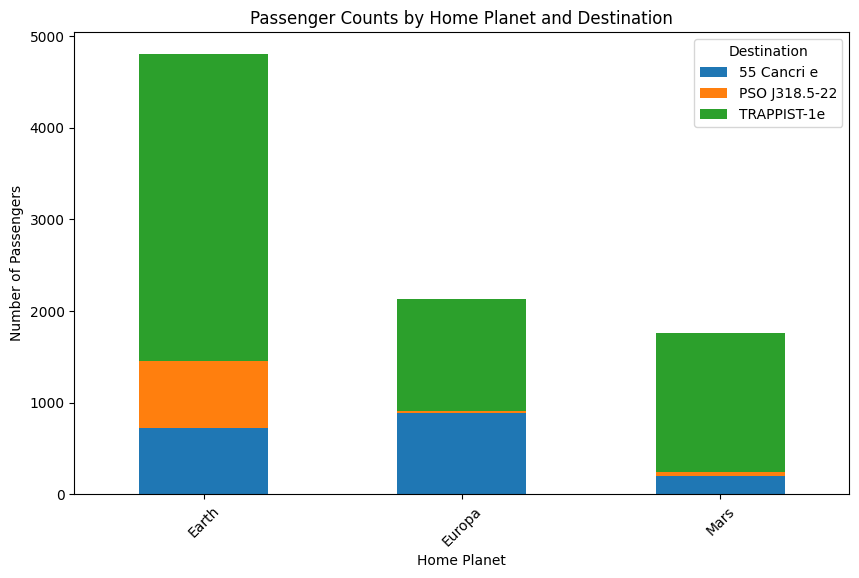

In [13]:

pivot_table = train_data.groupby(['HomePlanet', 'Destination']).size().unstack(fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Passenger Counts by Home Planet and Destination')
plt.xlabel('Home Planet')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)  
plt.legend(title='Destination')

plt.show()


This stacked bar chart shows the number of passengers traveling from three different home planets—Earth, Europa, and Mars—to various destinations. Earth is the most common home planet for passengers, with the majority heading to TRAPPIST-1e. TRAPPIST-1e is also the most popular destination for travelers from all three home planets, while 55 Cancri e and PSO J318.5-22 are less frequented destinations. Europa and Mars have significantly fewer travelers compared to Earth.

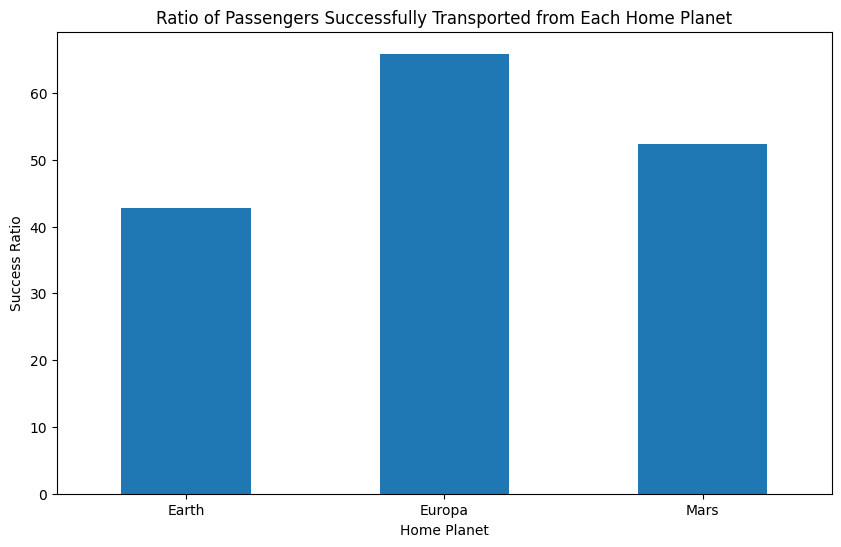

In [14]:

# Group data by 'HomePlanet' and 'Transported', and count the number of occurrences
grouped = train_data.groupby('HomePlanet')['Transported'].value_counts(normalize=True).unstack()

# The 'Transported' column contains True/False, after unstacking, True represents the success ratio
success_ratio = grouped[True] * 100

# Plotting the success ratio
success_ratio.plot(kind='bar', figsize=(10, 6))

plt.title('Ratio of Passengers Successfully Transported from Each Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Success Ratio')
plt.xticks(rotation=0)  # Keep the home planet names horizontal for better readability

plt.show()


From the "Passenger Counts by Home Planet and Destination" chart, we saw that most of the people started jouney frrom earth, but now according to the above plot Europa has the highest success ratio, followed by Mars, with Earth having the lowest. This means a higher percentage of passengers from Europa were successfully transported compared to the other two planets.

#### Success Ratio of Reaching Each Destination

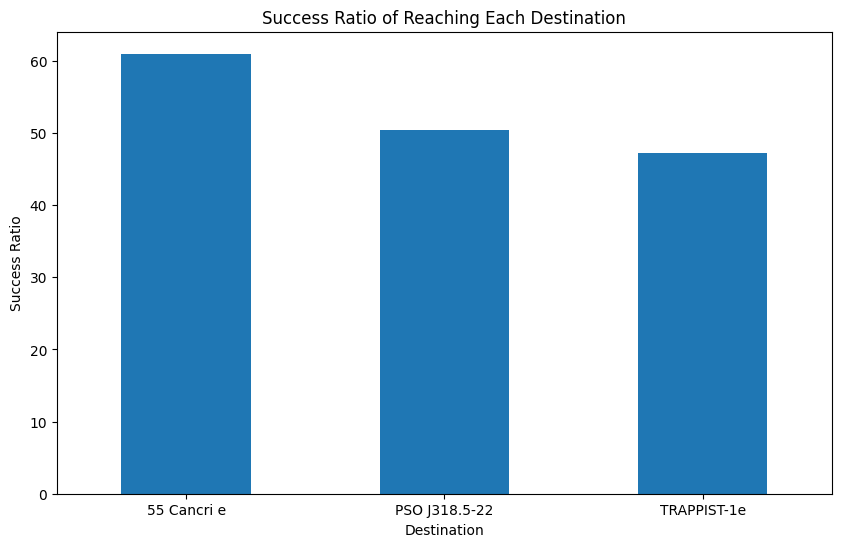

In [15]:
# Group data by 'Destination' and 'Transported', and count the number of occurrences
grouped_destination = train_data.groupby('Destination')['Transported'].value_counts(normalize=True).unstack()

# The 'Transported' column contains True/False, after unstacking, True represents the success ratio
success_ratio_destination = grouped_destination[True] *100

# Plotting the success ratio
success_ratio_destination.plot(kind='bar', figsize=(10, 6))

plt.title('Success Ratio of Reaching Each Destination')
plt.xlabel('Destination')
plt.ylabel('Success Ratio')
plt.xticks(rotation=0)  # Keep the destination names horizontal for better readability

plt.show()

From the "Passenger Counts by Home Planet and Destination" chart, we saw that most of the people started jouney for TRAPPIST-1e, followed by 55 Cancri and PSO J318.5-22. 
But here we see, the destination 55 Cancri e has the highest success ratio, which means a larger proportion of passengers heading there were successfully transported. PSO J318.5-22 has a slightly lower success ratio, and TRAPPIST-1e has the lowest among the three, although not by a large margin. 

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8693 non-null   object 
 15  Cabin_Num     8693 non-null   object 
 16  Side          8693 non-null   object 
dtypes: bool(3), float64(6), object(8)
memory usage: 976.4+ KB


In [114]:


# # One-hot encode categorical columns
df_encoded = pd.get_dummies(train_data, columns=['HomePlanet', 'Destination','Side'])

# # Converting boolean columns to integers
bool_columns = ['CryoSleep', 'VIP', 'Transported']
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)
non_numeric_columns = ['Name','Cabin','PassengerId']  
df_encoded = df_encoded.drop(non_numeric_columns, axis=1)




# df_encoded.columns

In [116]:

df_encoded['Cabin_Num'] = df_encoded['Cabin_Num'].astype(int)
bool_cols = df_encoded.columns[df_encoded.dtypes == 'bool']
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# df_encoded.info()

In [126]:

test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int32  
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   int32  
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   Deck                       4277 non-null   int64  
 9   Cabin_Num                  4277 non-null   object 
 10  passenger_group_freq       4277 non-null   int64  
 11  HomePlanet_Earth           4277 non-null   bool   
 12  HomePlanet_Europa          4277 non-null   bool   
 13  HomePlanet_Mars            4277 non-null   bool 

## Model Training

In [131]:
#columns_to_keep = ['PassengerId','CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
train = df_encoded
test = test_data
test_numeric = test.drop('PassengerId', axis=1)
PID = test['PassengerId']
test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(medians)
non_numeric_columns = ['Name','Cabin']  

test = test.drop(non_numeric_columns, axis=1)
test = test_numeric.assign(PassengerId=PID)

for column in test.columns:
    mode_value = test[column].mode()[0]
  
    test[column] = test[column].fillna(mode_value)

for dataset in [train, test]:
    deck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
    dataset['Deck'] = dataset['Deck'].map(deck)


test = pd.get_dummies(test, columns=['HomePlanet', 'Destination','Side'])

# # Converting boolean columns to integers
bool_columns = ['CryoSleep', 'VIP', ]
test[bool_columns] = test[bool_columns].astype(int)

test.head()






,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,passenger_group_freq,PassengerId,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_P,Side_S
0,1,G/3/S,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,...,1,0013_01,True,False,False,False,False,True,False,True
1,0,F/4/S,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,...,1,0018_01,True,False,False,False,False,True,False,True
2,1,C/0/S,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,...,1,0019_01,False,True,False,True,False,False,False,True
3,0,C/1/S,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,...,1,0021_01,False,True,False,False,False,True,False,True
4,0,F/5/S,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,...,1,0023_01,True,False,False,False,False,True,False,True


In [79]:
X = train.drop('Transported', axis=1)
y = train['Transported']

# Train multiple models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

#Split Datatra
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning 
param_dist_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train, y_train)
rf_best = random_search_rf.best_estimator_

# Hyperparameter tuning 
param_dist_gb = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
random_search_gb = RandomizedSearchCV(gb, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_gb.fit(X_train, y_train)
gb_best = random_search_gb.best_estimator_

# Hyperparameter tuning 
param_dist_knn = {'n_neighbors': [3, 5, 7, 9]}
random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_knn.fit(X_train, y_train)
knn_best = random_search_knn.best_estimator_

# Hyperparameter tuning 
param_dist_dt = {'max_depth': [10, 20, 30]}
random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_dt.fit(X_train, y_train)
dt_best = random_search_dt.best_estimator_

C:\Users\nuzha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\nuzha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\nuzha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C

## Model Evaluation

In [80]:
#Evaluate Models
clf = [rf_best, gb_best, knn_best, dt_best]


def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], X, y, n_jobs=1, scoring=scoring)
        print("Score of Model",i, "Accuracy: %0.2f%% (+/- %0.2f)" % (score.mean()*100, score.std() * 2*100))
model_fit()

voting_clf = VotingClassifier(estimators=[('rf', rf_best), ('gb', gb), ('knn', knn_best), ('dt_best', dt_best)], voting='soft')
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_ensemble = voting_clf.predict(X_val)
accuracy_ensemble = accuracy_score(y_val, y_pred_ensemble)
print(f'Ensemble Model Validation Accuracy: {accuracy_ensemble}')

Score of Model 0 Accuracy: 78.72% (+/- 4.83)
Score of Model 1 Accuracy: 76.17% (+/- 8.37)
Score of Model 2 Accuracy: 74.00% (+/- 7.98)
Score of Model 3 Accuracy: 74.68% (+/- 6.74)
Ensemble Model Validation Accuracy: 0.7849338700402531


## Feature Importance

In [81]:

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rf_best.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Cabin_Num,0.152
Age,0.117
Spa,0.110
CryoSleep,0.097
RoomService,0.094
VRDeck,0.094
FoodCourt,0.082
ShoppingMall,0.072
Deck,0.049


In [132]:
test = test.drop(['Cabin', 'Name'], axis=1)
test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_Num,passenger_group_freq,PassengerId,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_P,Side_S
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,7,3,1,0013_01,True,False,False,False,False,True,False,True
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,6,4,1,0018_01,True,False,False,False,False,True,False,True
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,3,0,1,0019_01,False,True,False,True,False,False,False,True
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,3,1,1,0021_01,False,True,False,False,False,True,False,True
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,6,5,1,0023_01,True,False,False,False,False,True,False,True


## Preparing Test Data and Making Predictions

In [145]:

test_data = test.drop(['PassengerId'], axis=1)

# Making predictions using the adjusted DataFrame
Y_test = voting_clf.predict(test_data)

# Converting binary predictions to boolean
Y_test_boolean = Y_test.astype(bool)

output = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': Y_test_boolean
})

directory = r"C:\Users\nuzha\Downloads"

if not os.path.exists(directory):
    os.makedirs(directory)

# Saving the DataFrame to CSV
output_file_path = os.path.join(directory, 'submission.csv')
output.to_csv(output_file_path, index=False)




- Model Score: 0.7849
- Kaggle Competition Score: .7947


## Resources

1. Referenced the GitHub repository by Ashish Patel for guidance: Titanic-Machine-Learning-from-Disaster.